In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import seaborn as sns
# set a seaborn style of your taste
sns.set_style("whitegrid")

# reading data files
uber = pd.read_csv('Uber Request Data.csv')
uber

,Request_id,Pickup_ point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 9:17,12/07/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 8:33,13/07/2016 9:25
5,3879,Airport,1.0,Trip Completed,13/07/2016 21:57,13/07/2016 22:28
6,4270,Airport,1.0,Trip Completed,14/07/2016 6:15,14/07/2016 7:13
7,5510,Airport,1.0,Trip Completed,15/07/2016 5:11,15/07/2016 6:07
8,6248,City,1.0,Trip Completed,15/07/2016 17:57,15/07/2016 18:50
9,267,City,2.0,Trip Completed,11/07/2016 6:46,11/07/2016 7:25


In [43]:
# Look at rounds head
print(uber.head())

   Request_id Pickup_ point  Driver_id          Status Request_timestamp  \
0         619       Airport        1.0  Trip Completed  11/07/2016 11:51   
1         867       Airport        1.0  Trip Completed  11/07/2016 17:57   
2        1807          City        1.0  Trip Completed   12/07/2016 9:17   
3        2532       Airport        1.0  Trip Completed  12/07/2016 21:08   
4        3112          City        1.0  Trip Completed   13/07/2016 8:33   

     Drop_timestamp  
0  11/07/2016 13:00  
1  11/07/2016 18:47  
2   12/07/2016 9:58  
3  12/07/2016 22:03  
4   13/07/2016 9:25  


In [3]:
# inspect the structure etc.
print(uber.info(), "\n")
print(uber.shape)
print(uber.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_ point        6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None 

(6745, 6)
        Request_id    Driver_id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [4]:
# identify the unique number of permalinks in uber
len(uber.Request_id.unique())

6745

In [5]:
# missing values in uner df
uber.isnull().sum()

Request_id              0
Pickup_ point           0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [ ]:
# print column names
uber.columns


In [6]:
# column-wise missing values 
uber.isnull().sum()

Request_id              0
Pickup_ point           0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [7]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request_id            0.00
Pickup_ point         0.00
Driver_id            39.29
Status                0.00
Request_timestamp     0.00
Drop_timestamp       58.03
dtype: float64

In [8]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request_id            0.00
Pickup_ point         0.00
Driver_id            39.29
Status                0.00
Request_timestamp     0.00
Drop_timestamp       58.03
dtype: float64

In [9]:
# summary stats of Drop_timestamp
uber['Drop_timestamp'].describe()

count                2831
unique               2282
top       13/07/2016 8:53
freq                    5
Name: Drop_timestamp, dtype: object

In [47]:
# removing NaNs in Driver_id
#uber['Drop_timestamp'] = pd.to_datetime(uber['Drop_timestamp'])
uber=uber[~np.isnan(uber['Driver_id'])]
#uber=uber[~np.isnan(uber['Request_timestamp'].astype(bool))]
uber=pd.isnull(uber['Request_timestamp'])
round(100*(uber.isnull().sum()/len(uber.index)), 2)
uber.interpolate(method="time")


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4065    False
4066    False
4067    False
4068    False
4069    False
4070    False
4071    False
4072    False
4073    False
4074    False
4075    False
4076    False
4077    False
4078    False
4079    False
4080    False
4081    False
4082    False
4083    False
4084    False
4085    False
4086    False
4087    False
4088    False
4089    False
4090    False
4091    False
4092    False
4093    False
4094    False
Name: Request_timestamp, Length: 4095, dtype: bool

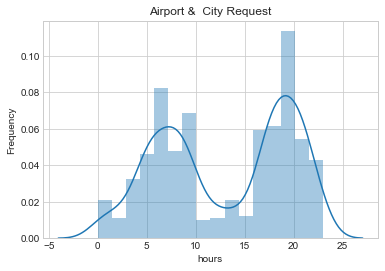

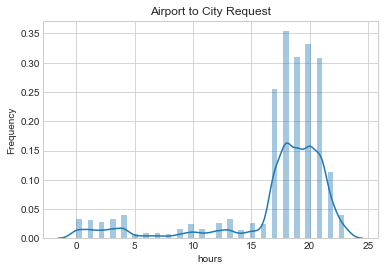

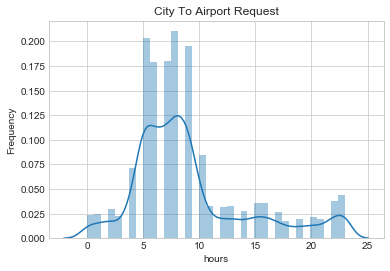

In [37]:
#formating date time & extrcting timing
uber['Drop_time'] = pd.to_datetime(uber['Drop_timestamp']).dt.strftime('%H:%M %p')
uber['Drop_date'] = pd.to_datetime(uber['Drop_timestamp']).dt.date
uber['Request_time'] = pd.to_datetime(uber['Request_timestamp']).dt.strftime('%H:%M %p')
uber['Request_date'] = pd.to_datetime(uber['Request_timestamp']).dt.date
uber['Drop_date'] = pd.to_datetime(uber["Drop_date"]).dt.strftime('%Y-%m-%d')
uber['Request_date'] = pd.to_datetime(uber['Request_date']).dt.strftime('%Y-%m-%d')
uber['hours'] = pd.DatetimeIndex(uber['Request_timestamp']).hour
uber
#filter with status
df=uber[(uber['Status']=='Cancelled') | (uber['Status']=='No Cars Available')]
df
#filter with pick_up points
dfc=df[df['Pickup_ point']=='City']
dfc
dfa=df[df['Pickup_ point']=='Airport']
dfa
#frequency analysis of requests & plot a graph for airport & city
plt.xlabel("Time_Slot")
plt.ylabel("Frequency")
plt.title('Airport &  City Request')
sns.distplot(df['hours'])
plt.show()

#airport to city histogram
plt.xlabel("Time_Slot")
plt.ylabel("Frequency")
plt.title ('Airport to City Request')
sns.distplot(dfa['hours'])
plt.show()
#from the graph data point get late evening(8 pm to 10 pm)

#city to airport histogram
plt.ylabel("Frequency")
plt.title ('City To Airport Request')
sns.distplot(dfc['hours'])
plt.show()
#from the graph data point get early morning(5 am to 7 am)


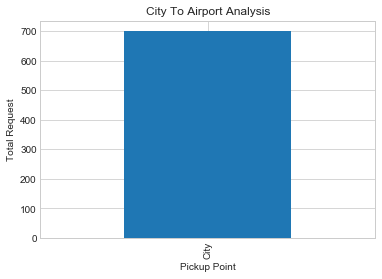

,hoursCancelled,hoursNo Cars Available,Total
Pickup_ point,,,
City,477,223,700


In [6]:
#City->Airport data analysis
#Early morning time stamp is captured from City->airport graph(Early Morning)
flt= dfc[dfc['hours'].astype(str).between('5', '7')]
dff = flt[['Pickup_ point','Status','hours']]
dff
df11 = dff.groupby(['Pickup_ point','Status']).count()
df21 = pd.pivot_table(df11,index=["Pickup_ point"], columns=["Status"], fill_value=0)
df21.columns =[s1 + str(s2) for (s1,s2) in df21.columns.tolist()]
df21
df21['Total'] = df21['hoursCancelled'] + df21['hoursNo Cars Available']
df211=df21['Total']

#City->Airport graph
df211.plot.bar(stacked=True)
plt.xlabel("Pickup Point")
plt.ylabel("Total Request")
plt.title('City To Airport Analysis')
plt.show()
df21

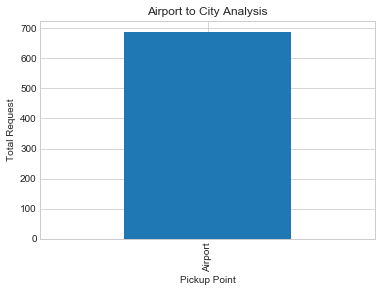

,hoursCancelled,hoursNo Cars Available,Total
Pickup_ point,,,
Airport,60,629,689


In [35]:
#airport to city data analysis
#Late Evening time stamp is captured from Airport->City graph(Late Evening)
filter1= dfa[dfa['hours'].astype(str).between('20', '22')]
dff1 = filter1[['Pickup_ point','Status','hours']]
dff1
dff2 = dff1.groupby(['Pickup_ point','Status']).count()
dff3 = pd.pivot_table(dff2,index=["Pickup_ point"], columns=["Status"], fill_value=0)
dff3.columns =[s1 + str(s2) for (s1,s2) in dff3.columns.tolist()]
dff3
dff3['Total'] = dff3['hoursCancelled'] + dff3['hoursNo Cars Available']
dff4=dff3['Total']

#city->airport is problematic type request as total no, of  requests rejected are 700 
#Airport->city graph
dff4.plot.bar(stacked=True)
plt.xlabel("Pickup Point")
plt.ylabel("Total Request")
plt.title('Airport to City Analysis')
plt.show()
dff3

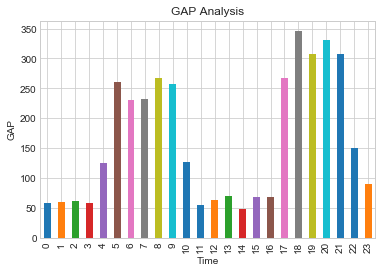

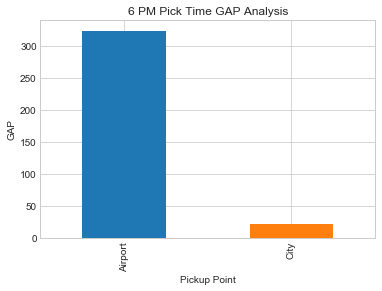

,hoursCancelled,hoursNo Cars Available,hoursTrip Completed,Total,GAP
Pickup_ point,,,,,
Airport,15,309,81,405,324
City,9,13,83,105,22


In [31]:
#Gap Analysis
df = uber[['Pickup_ point','Status','hours']]
df

df1 = df.groupby(['hours','Status']).count()
df2 = pd.pivot_table(df1,index=["hours"], columns=["Status"], fill_value=0)
df2.columns =[s1 + str(s2) for (s1,s2) in df2.columns.tolist()]
#GAP analysis 
df2['Total'] = df2['Pickup_ pointCancelled'] + df2['Pickup_ pointNo Cars Available'] + df2['Pickup_ pointTrip Completed']
df2['GAP'] = df2['Total'] - df2['Pickup_ pointTrip Completed']

#max value of GAP
mx=df2['GAP'].max()
mx

#Display GAP in graph
df3 = df2['GAP'] 
df3.plot.bar()
plt.xlabel("Time")
plt.ylabel("GAP")
plt.title('GAP Analysis')
plt.show()
df2

df4=df[df['hours']==18]
df5 = df4.groupby(['Pickup_ point','Status']).count()
df5
df6 = pd.pivot_table(df5,index=["Pickup_ point"], columns=["Status"], fill_value=0)
df6.columns =[s1 + str(s2) for (s1,s2) in df6.columns.tolist()]

df6['Total'] = df6['hoursCancelled'] + df6['hoursNo Cars Available'] + df6['hoursTrip Completed']
df6['GAP'] = df6['Total'] - df6['hoursTrip Completed']
df7 = df6['GAP'] 

df7.plot.bar(stacked=True)
plt.xlabel("Pickup Point")
plt.ylabel("GAP")
plt.title('6 PM Pick Time GAP Analysis')
plt.show()

#Display GAP between airport & city
df6 

#Airport->City contains maximum GAP

In [26]:
#export uber data for presentation
df2.to_csv("uber_gap.csv")
df6.to_csv("uber_pickup.csv")
uber.to_csv("uber_whole_data")


